# **1. 텐서플로우**

텐서플로우(TensorFlow)는 구글에서 개발한 오픈소스 머신러닝 라이브러리로, 수치 계산과 딥러닝 모델 구축을 위한 강력한 기능을 제공합니다. 데이터 흐름 그래프(Data Flow Graph)를 기반으로 작동하며, 노드(Node)는 연산을, 엣지(Edge)는 다차원 배열인 텐서(Tensor)를 나타냅니다. CPU, GPU, TPU 등 다양한 하드웨어에서 효율적으로 작동하며, 특히 대규모 신경망 학습과 추론에 적합합니다. 텐서플로우는 파이썬을 주로 사용하며, 직관적인 고수준 API인 Keras를 포함하고 있어 모델을 쉽고 빠르게 구축할 수 있는 환경을 제공합니다.

### **1. 텐서란?**

TensorFlow에서의 텐서(Tensor)는 다차원 배열을 표현하는 핵심 데이터 구조로, 기능적으로는 파이썬의 넘파이(NumPy) 배열과 매우 유사합니다. 그러나 단순한 배열을 넘어서, 텐서는 딥러닝 모델 학습에 필수적인 자동 미분(automatic differentiation) 기능을 지원하며, 이를 통해 모델 학습 시 역전파(backpropagation)를 자동으로 처리할 수 있습니다. 텐서는 GPU나 TPU와 같은 다양한 장치에서 효율적으로 계산될 수 있도록 설계되어 있으며, 다음과 같은 기본 속성을 가집니다:

- 모양(shape): 텐서가 가지는 차원의 크기를 나타내며, 예를 들어 (3, 4)는 3행 4열의 2차원 텐서를 의미합니다.
- 자료형(data type): 텐서에 저장되는 데이터의 타입으로, float32, int32 등 다양한 타입이 있습니다.
- 저장된 장치(device): 텐서가 현재 어느 하드웨어(CPU, GPU 등)에 저장되어 있는지를 나타냅니다.

In [2]:
import tensorflow as tf

In [ ]:
data = [
    [1, 2],
    [3, 4]
]
x = tf.constant(data)

# tf.constant() : 변경 불가능한(=상수)
# tf.Variable() : 변수

print(x)
print('--------------------------------')
print(tf.rank(x)) # rank: 텐서의 차원 수. 즉, shape의 길이

print('--------------------------------')

data = tf.constant("String")  # 문자열 "String"을 텐서로 만듦
print(data)
# tf.Tensor(b'String', shape=(), dtype=string)
# b : 바이트, shape: 없음(대괄호가 없으니까 벡터가 아님)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
--------------------------------
tf.Tensor(2, shape=(), dtype=int32)
--------------------------------
tf.Tensor(b'String', shape=(), dtype=string)


In [3]:
# 스칼라 (0차원)
a = tf.constant(7)
print(tf.rank(a))  # 출력: tf.Tensor(0, shape=(), dtype=int32)

# 벡터 (1차원)
b = tf.constant([1, 2, 3])
print(tf.rank(b))  # 출력: tf.Tensor(1, shape=(), dtype=int32)

# 행렬 (2차원)
c = tf.constant([[1, 2], [3, 4]])
print(tf.rank(c))  # 출력: tf.Tensor(2, shape=(), dtype=int32)

# 3차원 텐서
d = tf.constant([[[1], [2]], [[3], [4]]])
print(tf.rank(d))  # 출력: tf.Tensor(3, shape=(), dtype=int32)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)


In [ ]:
a = tf.constant([5])
b = tf.constant([7])

c = (a + b).numpy()
print(c)
print(type(c))

print('--------------------------------')

result = c * 10
tensor = tf.convert_to_tensor(result)
print(tensor)
# tf.Tensor([120], shape=(1,), dtype=int32) => 정수 120을 1개 담고 있는 1차원 벡터 텐서
# shape=(1,) : 1차원 텐서, 원소 1개 (즉, 벡터 형태)
print(type(tensor))

[12]
<class 'numpy.ndarray'>
--------------------------------
tf.Tensor([120], shape=(1,), dtype=int32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


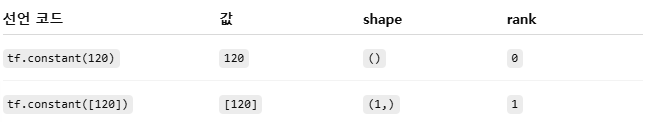

**EagerTensor**

EagerTensor는 TensorFlow에서 연산이 즉시 실행되는 방식인 Eager Execution 모드에서 생성되는 텐서입니다.
기존의 TensorFlow 1.x에서는 연산을 그래프로 정의한 후, Session을 통해 실행해야 했지만, TensorFlow 2.x부터는 즉시 실행(Eager Execution)이 기본값으로 활성화되어, Python 코드처럼 한 줄 한 줄 바로 계산 결과를 확인할 수 있게 되었습니다.

In [ ]:
x = tf.constant([
    [5, 7],
    [1, 2]
])

# x와 같은 모양과 자료형을 가지지만, 값이 1인 텐서 생성
x_ones = tf.ones_like(x)
print(x_ones)

print('--------------------------------')

# x와 같은 모양을 가지되, 자료형은 float, 값은 랜덤으로 채우기
x_rand = tf.random.uniform(shape=x.shape, dtype=tf.float32) # uniform distribution [0, 1]
print(x_rand)

tf.Tensor(
[[1 1]
 [1 1]], shape=(2, 2), dtype=int32)
--------------------------------
tf.Tensor(
[[0.6092198  0.934132  ]
 [0.46160424 0.23846138]], shape=(2, 2), dtype=float32)


# **2. 텐서의 형변환 및 차원 조작**

In [ ]:
tensor = tf.constant([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])

print(tensor[0])  # first row
print(tensor[:, 0])  # first column
print(tensor[..., -1])  # last column

tf.Tensor([1 2 3 4], shape=(4,), dtype=int32)
tf.Tensor([1 5 9], shape=(3,), dtype=int32)
tf.Tensor([ 4  8 12], shape=(3,), dtype=int32)


In [ ]:
tensor = tf.constant([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])

# axis: 텐서를 이어 붙이기 위한 축
# 0번 축(행)을 기준으로 이어 붙이기
result = tf.concat([tensor, tensor, tensor], axis=0)
print(result)

print('--------------------------------')

# 1번 축(열)을 기준으로 이어 붙이기
result = tf.concat([tensor, tensor, tensor], axis=1)
print(result)

tf.Tensor(
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]], shape=(9, 4), dtype=int32)
--------------------------------
tf.Tensor(
[[ 1  2  3  4  1  2  3  4  1  2  3  4]
 [ 5  6  7  8  5  6  7  8  5  6  7  8]
 [ 9 10 11 12  9 10 11 12  9 10 11 12]], shape=(3, 12), dtype=int32)


In [ ]:
a = tf.constant([2])
b = tf.constant([5.0])

print(a.dtype)
print(b.dtype)

# 텐서 a를 float32 형식으로 변경한 뒤에 더하기 수행
print(tf.cast(a, tf.float32) + b)

<dtype: 'int32'>
<dtype: 'float32'>
tf.Tensor([7.], shape=(1,), dtype=float32)


In [ ]:
# Variable: 텐서(변수)
a = tf.Variable([1, 2, 3, 4, 5, 6, 7, 8])
# reshape: 복사가 아닌 view
b = tf.reshape(a, (4, 2))
print(a)
print('--------------------------------')
print(b)

print('--------------------------------')

# a와 b는 서로 다른 객체
a.assign_add([1, 1, 1, 1, 1, 1, 1, 1])
print(a)
print('--------------------------------')
print(b)

<tf.Variable 'Variable:0' shape=(8,) dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int32)>
--------------------------------
tf.Tensor(
[[1 2]
 [3 4]
 [5 6]
 [7 8]], shape=(4, 2), dtype=int32)
--------------------------------
<tf.Variable 'Variable:0' shape=(8,) dtype=int32, numpy=array([2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>
--------------------------------
tf.Tensor(
[[1 2]
 [3 4]
 [5 6]
 [7 8]], shape=(4, 2), dtype=int32)


In [ ]:
a = tf.random.uniform((64, 32, 3))
print(a.shape)

print('--------------------------------')

b = tf.transpose(a, perm=[2, 1, 0]) # 차원 자체를 교환
# (2번째 축, 1번째 축, 0번째 축)의 형태가 되도록 한다.
print(b.shape)

(64, 32, 3)
--------------------------------
(3, 32, 64)


# **3. 텐서의 연산과 함수**

In [ ]:
a = tf.constant([
    [1, 2],
    [3, 4]
])
b = tf.constant([
    [5, 6],
    [7, 8]
])
# 사칙연산
print(a + b)
print(a - b)
print(a * b)
print(a / b)

# 행렬곱
print(tf.matmul(a, b))

tf.Tensor(
[[ 6  8]
 [10 12]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[-4 -4]
 [-4 -4]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[ 5 12]
 [21 32]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[0.2        0.33333333]
 [0.42857143 0.5       ]], shape=(2, 2), dtype=float64)
tf.Tensor(
[[19 22]
 [43 50]], shape=(2, 2), dtype=int32)


In [ ]:
a = tf.constant([
    [1, 2, 3, 4],
    [5, 6, 7, 8]
])
print(a)
print('--------------------------------')
print(tf.reduce_mean(a)) # 전체 원소에 대한 평균
print(tf.reduce_mean(a, axis=0)) # 각 열에 대하여 평균 계산
print(tf.reduce_mean(a, axis=1)) # 각 행에 대하여 평균 계산
print('--------------------------------')
print(tf.reduce_sum(a)) # 전체 원소에 대한 합계
print(tf.reduce_sum(a, axis=0)) # 각 열에 대하여 합계 계산
print(tf.reduce_sum(a, axis=1)) # 각 행에 대하여 합계 계산
print('--------------------------------')
print(tf.reduce_max(a)) # 전체 원소에 대한 최댓값
print(tf.reduce_max(a, axis=0)) # 각 열에 대하여 최댓값 계산
print(tf.reduce_max(a, axis=1)) # 각 행에 대하여 최댓값 계산
print('--------------------------------')
print(tf.argmax(a, axis=0)) # 각 열에 대하여 최댓값의 인덱스 계산
print(tf.argmax(a, axis=1)) # 각 행에 대하여 최댓값의 인덱스 계산

tf.Tensor(
[[1 2 3 4]
 [5 6 7 8]], shape=(2, 4), dtype=int32)
--------------------------------
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor([3 4 5 6], shape=(4,), dtype=int32)
tf.Tensor([2 6], shape=(2,), dtype=int32)
--------------------------------
tf.Tensor(36, shape=(), dtype=int32)
tf.Tensor([ 6  8 10 12], shape=(4,), dtype=int32)
tf.Tensor([10 26], shape=(2,), dtype=int32)
--------------------------------
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor([5 6 7 8], shape=(4,), dtype=int32)
tf.Tensor([4 8], shape=(2,), dtype=int32)
--------------------------------
tf.Tensor([1 1 1 1], shape=(4,), dtype=int64)
tf.Tensor([3 3], shape=(2,), dtype=int64)


In [ ]:
a = tf.constant([
    [1, 2, 3, 4],
    [5, 6, 7, 8]
])

print(a.shape)
print('--------------------------------')
# 첫 번째 축에 차원 추가
a = tf.expand_dims(a, 0)
print(a)
print(a.shape)  # 2행 4열 1개 → 배치 차원처럼 쓰일 수 있음 (예: 이미지 1장)(배치용)
print('--------------------------------')
# 네 번째 축에 차원 추가
a = tf.expand_dims(a, 3)
print(a)
print(a.shape)  # 4행1열 2개가 1개로 감싸져 있다. → 채널 차원처럼 쓰일 수 있다.(예: grayscale 이미지의 채널)(채널용)
print('--------------------------------')
# 크기가 1인 차원 제거
a = tf.squeeze(a)
print(a)
print(a.shape)

(2, 4)
--------------------------------
tf.Tensor(
[[[1 2 3 4]
  [5 6 7 8]]], shape=(1, 2, 4), dtype=int32)
(1, 2, 4)
--------------------------------
tf.Tensor(
[[[[1]
   [2]
   [3]
   [4]]

  [[5]
   [6]
   [7]
   [8]]]], shape=(1, 2, 4, 1), dtype=int32)
(1, 2, 4, 1)
--------------------------------
tf.Tensor(
[[1 2 3 4]
 [5 6 7 8]], shape=(2, 4), dtype=int32)
(2, 4)


# **4. 자동 미분과 기울기**

In [ ]:
x = tf.Variable([3.0, 4.0])
y = tf.Variable([1.0, 2.0])

# 진행되는 모든 연산들을 기록
with tf.GradientTape() as tape:
    z = x + y
    loss = tf.math.reduce_mean(z)

dx = tape.gradient(loss, x) # loss가 scalar이므로 계산 가능
print(dx)

 # with문: 자동으로 닫힘
 # tf.GradientTape(): 미분을 자동으로 추적

tf.Tensor([0.5 0.5], shape=(2,), dtype=float32)


<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(
[4.53958077e-05 5.55575620e-05 6.79936937e-05 8.32130942e-05
 1.01838442e-04 1.24631609e-04 1.52524715e-04 1.86658091e-04
 2.28426653e-04 2.79536554e-04 3.42074339e-04 4.18591319e-04
 5.12206458e-04 6.26731702e-04 7.66824507e-04 9.38173215e-04
 1.14772200e-03 1.40394326e-03 1.71716676e-03 2.09997591e-03
 2.56768332e-03 3.13889855e-03 3.83620191e-03 4.68693782e-03
 5.72413978e-03 6.98759437e-03 8.52504404e-03 1.03935138e-02
 1.26607241e-02 1.54065171e-02 1.87241696e-02 2.27213903e-02
 2.75206964e-02 3.32587242e-02 4.00838615e-02 4.81513998e-02
 5.76152215e-02 6.86149280e-02 8.12573764e-02 9.55919842e-02
 1.11580066e-01 1.29060077e-01 1.47712989e-01 1.67034879e-01
 1.86326443e-01 2.04710159e-01 2.21183725e-01 2.34711795e-01
 2.44347497e-01 2.49363393e-01 2.49363393e-01 2.44347497e-01
 2.34711795e-01 2.21183725e-01 2.04710159e-01 1.86326443e-01
 1.67034879e-01 1.47712989e-01 1.29060077e-01 1.11580066e-01
 9.55919842e-02 8.12

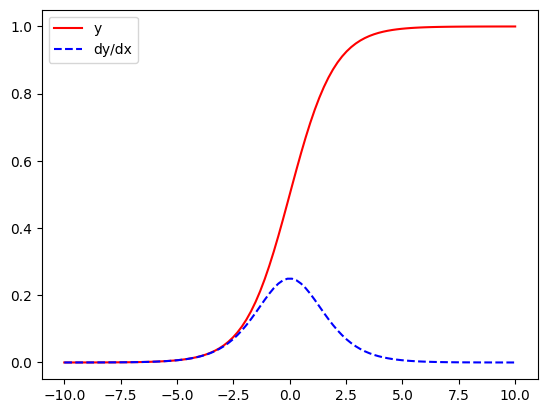

In [8]:
# linspace(start, stop, num): 등간격 숫자 생성 함수
x = tf.linspace(-10, 10, 100)

with tf.GradientTape() as tape:
    tape.watch(x) # x는 constant이므로 자동 추적되지 않음 → watch() 필요
    y = tf.nn.sigmoid(x)

dx = tape.gradient(y, x)  # y를 x에 대해 미분(미분 대상: x)
print(dx)


import matplotlib.pyplot as plt

plt.plot(x, y, 'r', label="y")
plt.plot(x, dx, 'b--', label="dy/dx")
plt.legend()
plt.show()

# tf.Variable은 자동으로 추적되지만, tf.constant는 자동으로 추적되지 않음 ❌

# 변수, 상수 확인 방법
# print(type(x))
# <class 'tensorflow.python.framework.ops.EagerTensor'>  ← 상수 (`tf.constant`)
# <class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>  ← 변수 (`tf.Variable`)


# **2. 모델 만들기**

In [ ]:
from google.colab import files
files.upload()  # kaggle.json 업로드 창 표시

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download pratik2901/multiclass-weather-dataset

Dataset URL: https://www.kaggle.com/datasets/pratik2901/multiclass-weather-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/91.4M [00:00<?, ?B/s]
100% 91.4M/91.4M [00:00<00:00, 1.20GB/s]


### 1. 임포트

In [ ]:
import os
import zipfile
import random
from shutil import copyfile, rmtree

### 2. 파일 경로 설정

In [ ]:
zip_file = 'multiclass-weather-dataset.zip'
base_dir = './Multi-class Weather Dataset'  # 압축 해제 시 dir
train_dir = './train'
test_dir = './test'

In [ ]:
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('.') # 현재 디렉토리에 압축해제

In [ ]:
# 분류 디렉터리 목록
categories = ['Cloudy', 'Rain', 'Shine', 'Sunrise']

if os.path.exists(train_dir):   # 폴더가 존재하면 지우고 다시 만들어라
    rmtree(train_dir)
if os.path.exists(test_dir):
    rmtree(test_dir)

# train, test 폴더 및 하위 카테고리 폴더 생성
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

for category in categories:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)

### 3. 데이터 분할

In [ ]:
base_dir = '/content/Multi-class Weather Dataset'

# 각 카테고리별 데이터 파일 나누기
for category in categories:
    category_path = os.path.join(base_dir, category)
    files = os.listdir(category_path)

    # 데이터 섞기
    random.shuffle(files)

    # 데이터 나누기 (8:2 비율)
    split_idx = int(len(files) * 0.8)
    train_files = files[:split_idx]
    test_files = files[split_idx:]

    # 파일 복사
    for file in train_files:
        src = os.path.join(category_path, file)
        dst = os.path.join(train_dir, category, file)
        copyfile(src, dst)

    for file in test_files:
        src = os.path.join(category_path, file)
        dst = os.path.join(test_dir, category, file)
        copyfile(src, dst)

print("데이터 분리가 완료되었습니다.")

데이터 분리가 완료되었습니다.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

import numpy as np
import matplotlib.pyplot as plt

### 4. 정규화

In [ ]:
# 정규화
train_generator = ImageDataGenerator(
    rescale = 1/255,  # 픽셀 값을 0~1로 정규화
    horizontal_flip=True,  # 좌우반전(데이터 증강)
    validation_split = 0.2   # train 폴더의 20%를 검증용으로 사용
)

test_generator = ImageDataGenerator(rescale = 1/255)  # 테스트는 데이터 증강X

### 5. 데이터 제너레이터 설정

: .../ 폴더에 있는 이미지들을 불러와서, 학습용, 검증용, 테스트용 데이터셋(..._flow)을 만드는 작업

In [ ]:
train_flow = train_generator.flow_from_directory(
    directory='train/',
    shuffle=True,
    target_size=(224, 224),
    class_mode='categorical',  # 원핫인코딩 라벨을 사용하겠다!
    batch_size=64,
    subset='training'
)

val_flow = train_generator.flow_from_directory(
    directory='train/',
    shuffle = False,
    target_size = (224, 224),
    class_mode = 'categorical',
    batch_size = 64,
    subset = 'validation'
)

test_flow = test_generator.flow_from_directory(
    directory = 'test/',
    shuffle=False,
    target_size = (224, 224),
    class_mode = 'categorical',  # train, test 모두 폴더가 나뉘어져 있어야 원핫인코딩이 진행된다.
    batch_size = 64
)

Found 720 images belonging to 4 classes.
Found 179 images belonging to 4 classes.
Found 226 images belonging to 4 classes.


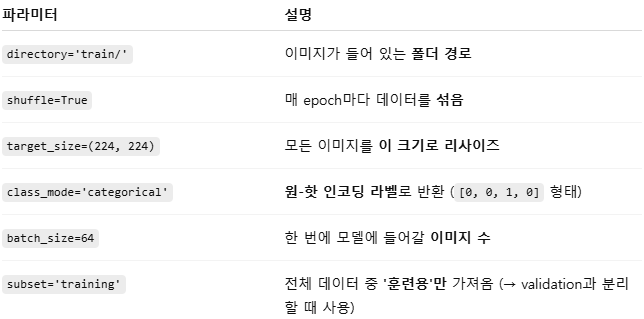

### 6. 데이터 확인

['Cloudy', 'Shine', 'Rain', 'Cloudy']


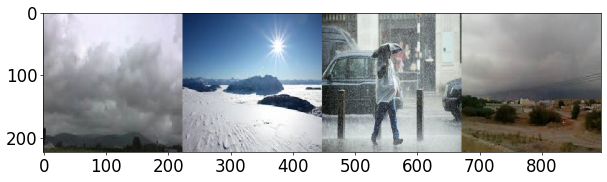

In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 60
plt.rcParams.update({'font.size': 20})

class_names = {
  0: "Cloudy",
  1: "Rain",
  2: "Shine",
  3: "Sunrise"
}

images, targets = next(train_flow)  # iter사용할 필요X

print([class_names[x] for x in np.argmax(targets[:4], axis=1)])
plt.imshow(np.concatenate((images[0], images[1], images[2], images[3]), axis=1))
plt.show()

### 7. 모델 구현

In [ ]:
def get_model_1():
    model = Sequential()
    model.add(layers.Input(shape=(224, 224, 3)))
    model.add(layers.Flatten())        # 평탄화 → (224 * 224 * 3 = 150,528)
    model.add(layers.Dense(4, activation='softmax'))     # (150,528 * 4) + 4 = 602,116
    return model

In [ ]:
model = get_model_1()
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │       602,116 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 602,116 (2.30 MB)

 Trainable params: 602,116 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def get_model_2():
    model = Sequential()
    model.add(layers.Input(shape=(224, 224, 3)))
    model.add(layers.Flatten())                                     # 평탄화 → (224 * 224 * 3 = 150,528)
    model.add(layers.Dense(64, activation='relu'))     #  은닉층   (150,528 * 64) + 64 = 9,633,856
    model.add(layers.Dense(4, activation='softmax'))
    # 출력층  입력:64개 (이전 Dense 레이어 출력),  출력: 4개 (클래스 수)
    # (Weight: 64*4 = 256 , bias: 4  총합 260개)
    return model

In [ ]:
model = get_model_2()
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     9,633,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,634,116 (36.75 MB)

 Trainable params: 9,634,116 (36.75 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def get_model_3():
    model = Sequential()
    model.add(layers.Input(shape=(224, 224, 3)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))  # 150528 * 128 + 128
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))   # 128 * 64 + 64
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(32, activation="relu"))   # 64 * 32 + 32
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4, activation="softmax"))   # 32 * 4 + 4
    return model

In [ ]:
model = get_model_3()
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    19,267,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,278,180 (73.54 MB)

 Trainable params: 19,278,180 (73.54 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_1 = get_model_1()
learning_rate = 0.01

# 학습 준비 단계(compile) : Optimizer + Loss + Metrics 설정
model_1.compile(
    optimizer = optimizers.SGD(learning_rate=learning_rate),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

# 학습 실행 : model.fit(...), 제너레이터에서 데이터 받아 학습
# 결과 저장 : history로 학습/검증 성능 추적 가능
history = model_1.fit(
    train_flow,  # 데이터로더 역할
    epochs = 20,
    validation_data = val_flow  # 검증(validation)용 데이터셋을 따로 지정해주는 부분
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 545ms/step - accuracy: 0.2705 - loss: 60.0932 - val_accuracy: 0.5810 - val_loss: 13.5611
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 370ms/step - accuracy: 0.5439 - loss: 34.0691 - val_accuracy: 0.6480 - val_loss: 9.4886
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 404ms/step - accuracy: 0.5777 - loss: 32.3150 - val_accuracy: 0.6425 - val_loss: 35.7653
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 431ms/step - accuracy: 0.5893 - loss: 31.3429 - val_accuracy: 0.5531 - val_loss: 27.8813
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 376ms/step - accuracy: 0.6637 - loss: 20.5547 - val_accuracy: 0.5028 - val_loss: 70.4144
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 471ms/step - accuracy: 0.6427 - loss: 29.7690 - val_accuracy: 0.5419 - val_loss: 24.5250
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 424ms/step - accuracy: 0.6504 - loss: 17.9832 - val_accuracy: 0.5419 - val_loss: 19.6856
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 562ms/step - accuracy: 0.7153 - loss: 13.1902 - v

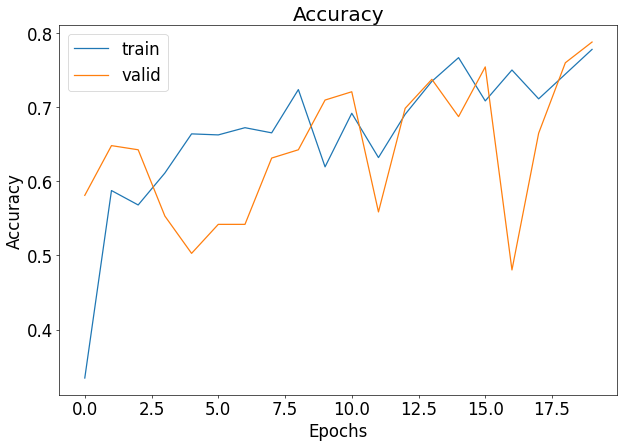

In [ ]:
# 정확도 그래프
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Accuracy')
plt.legend(['train', 'valid'])
plt.show()

In [ ]:
# 테스트
test_history = model_1.evaluate(test_flow)
test_loss, test_accuracy = test_history

print(f"Test loss: {test_loss:.8f}")
print(f"Test accuracy: {test_accuracy * 100.:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 277ms/step - accuracy: 0.6918 - loss: 8.8044
Test loss: 7.28856468
Test accuracy: 74.78%


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │     9,633,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,634,116 (36.75 MB)

 Trainable params: 9,634,116 (36.75 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 561ms/step - accuracy: 0.2326 - loss: 16.1277 - val_accuracy: 0.2682 - val_loss: 1.3855
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 454ms/step - accuracy: 0.2871 - loss: 1.3856 - val_accuracy: 0.2235 - val_loss: 1.3802
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 544ms/step - accuracy: 0.2917 - loss: 1.3750 - val_accuracy: 0.3184 - val_loss: 1.3581
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 415ms/step - accuracy: 0.3172 - loss: 1.3211 - val_accuracy: 0.3184 - val_loss: 1.1838
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 569ms/step - accuracy: 0.3610 - loss: 1.1974 - val_accuracy: 0.4469 - val_loss: 1.0795
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 423ms/step - accuracy: 0.4740 - loss: 1.0187 - val_accuracy: 0.5084 - val_loss: 1.0448
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 499ms/step - accuracy: 0.4770 - loss: 1.0172 - val_accuracy: 0.5419 - val_loss: 1.0417
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 571ms/step - accuracy: 0.5116 - loss: 1.0007 - val_accuracy: 0

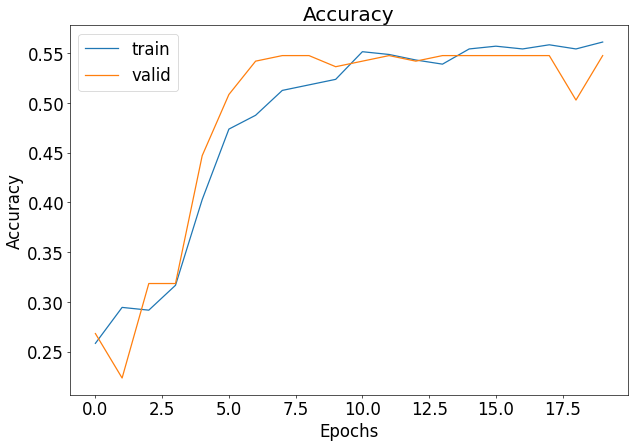

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 272ms/step - accuracy: 0.5938 - loss: 1.1154
Test loss: 0.95336336
Test accuracy: 55.75%


In [ ]:
model_2 = get_model_2()
model_2.summary()
learning_rate = 0.01

# 학습 준비 단계(compile)
model_2.compile(
    optimizer=optimizers.SGD(learning_rate=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# 학습 수행
history = model_2.fit(
    train_flow,
    epochs=20,
    validation_data=val_flow
)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Accuracy')
plt.legend(['train', 'valid'])
plt.show()

# 학습된 모델 테스트
test_history = model_2.evaluate(test_flow)
test_loss, test_accuracy = test_history

print(f"Test loss: {test_loss:.8f}")
print(f"Test accuracy: {test_accuracy * 100.:.2f}%")

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │    19,267,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,278,180 (73.54 MB)

 Trainable params: 19,278,180 (73.54 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 558ms/step - accuracy: 0.2629 - loss: 3.9356 - val_accuracy: 0.2011 - val_loss: 1.4000
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 584ms/step - accuracy: 0.3089 - loss: 1.4023 - val_accuracy: 0.3128 - val_loss: 1.3806
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 483ms/step - accuracy: 0.2984 - loss: 1.3782 - val_accuracy: 0.3184 - val_loss: 1.3746
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 561ms/step - accuracy: 0.2554 - loss: 1.3659 - val_accuracy: 0.3184 - val_loss: 1.2879
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 488ms/step - accuracy: 0.2635 - loss: 1.3341 - val_accuracy: 0.3184 - val_loss: 1.2981
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 579ms/step - accuracy: 0.2872 - loss: 1.3085 - val_accuracy: 0.3184 - val_loss: 1.2066
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 471ms/step - accuracy: 0.2905 - loss: 1.2650 - val_accuracy: 0.3184 - val_loss: 1.2503
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 569ms/step - accuracy: 0.2972 - loss: 1.2976 - val_accuracy: 0.

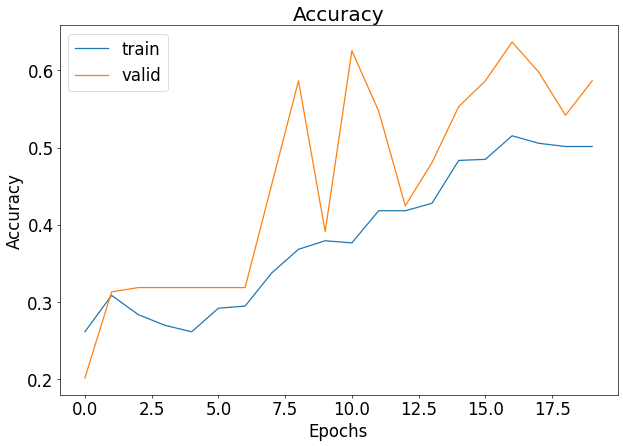

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 290ms/step - accuracy: 0.6364 - loss: 1.1425
Test loss: 0.99317032
Test accuracy: 61.06%


In [ ]:
model_3 = get_model_3()
model_3.summary()
learning_rate = 0.01

# 학습 준비 단계(compile)
model_3.compile(
    optimizer=optimizers.SGD(learning_rate=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# 학습 수행
history = model_3.fit(
    train_flow,
    epochs=20,
    validation_data=val_flow
)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Accuracy')
plt.legend(['train', 'valid'])
plt.show()

# 학습된 모델 테스트
test_history = model_3.evaluate(test_flow)
test_loss, test_accuracy = test_history

print(f"Test loss: {test_loss:.8f}")
print(f"Test accuracy: {test_accuracy * 100.:.2f}%")